In [24]:
options(warn = -1)
library(dplyr)
par(family = 'AppleGothic', bg = '#fafafa')

In [25]:
# Anaconda Navigator에서 r-party설치
library(party)

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


In [26]:
# Sampling
set.seed(1234)
library(caret)

samp <- createDataPartition(iris$Species, p=0.7, list=F)

In [27]:
# 학습용
# ctree는 표준화할 필요가 없음
data.tr <- iris[samp,]
data.test <- iris[-samp,]

In [28]:
# 학습시키기
model.ctree <- ctree(Species ~ . , data = data.tr)

In [29]:
# 문제 및 정답 만들기
x <- subset(data.test, select = -Species)
y <- data.test$Species

In [30]:
# 검증하기
pred <- predict(model.ctree, x)
head(pred)

[1] setosa setosa setosa setosa setosa setosa
Levels: setosa versicolor virginica

[1] 0.8888889

            y
pred         setosa versicolor virginica
  setosa         13          0         0
  versicolor      2         13         1
  virginica       0          2        14

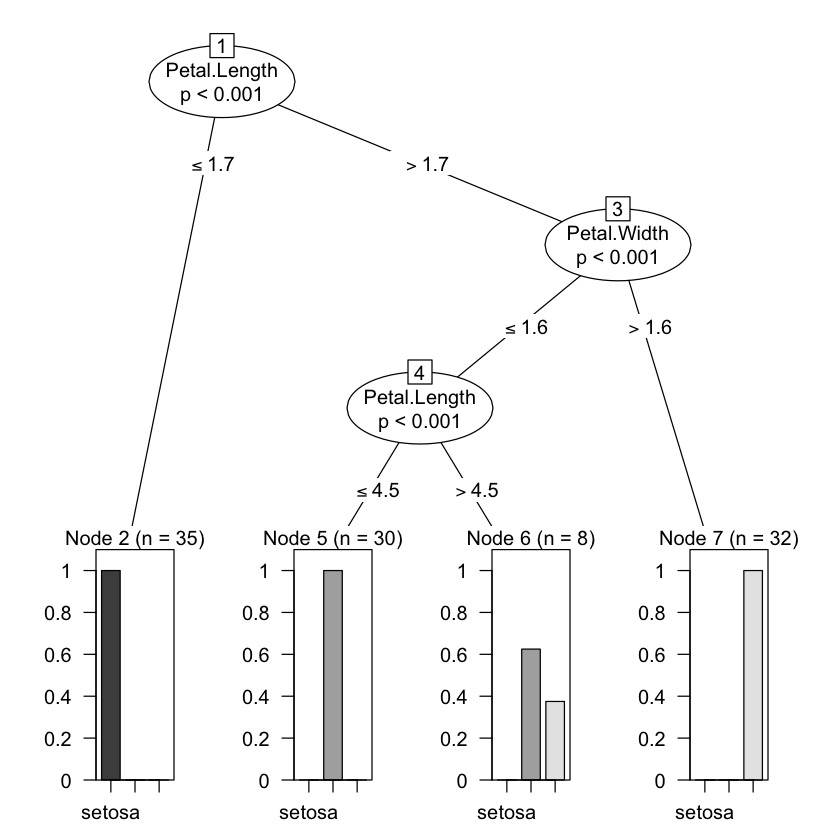

In [41]:
# 예측력과 오류분포

# 예측력 확인
mean(pred == y)
# 정오표 확인
table(pred, y)

plot(model.ctree)


In [32]:
# 표준화 ? 
scale(iris$Sepal.Length)[1:5]

[1] -0.8976739 -1.1392005 -1.3807271 -1.5014904 -1.0184372

In [33]:
# 표준화 = (X - 평균()) / 표준편차() ; X 에 데이터 입력, 평균과 표준편차는 training 한 데이터를 사용해야한다.
(iris$Sepal.Length - mean(iris$Sepal.Length) ) / sd(iris$Sepal.Length)

[1] -0.89767388 -1.13920048 -1.38072709 -1.50149039 -1.01843718 -0.53538397
  [7] -1.50149039 -1.01843718 -1.74301699 -1.13920048 -0.53538397 -1.25996379
 [13] -1.25996379 -1.86378030 -0.05233076 -0.17309407 -0.53538397 -0.89767388
 [19] -0.17309407 -0.89767388 -0.53538397 -0.89767388 -1.50149039 -0.89767388
 [25] -1.25996379 -1.01843718 -1.01843718 -0.77691058 -0.77691058 -1.38072709
 [31] -1.25996379 -0.53538397 -0.77691058 -0.41462067 -1.13920048 -1.01843718
 [37] -0.41462067 -1.13920048 -1.74301699 -0.89767388 -1.01843718 -1.62225369
 [43] -1.74301699 -1.01843718 -0.89767388 -1.25996379 -0.89767388 -1.50149039
 [49] -0.65614727 -1.01843718  1.39682886  0.67224905  1.27606556 -0.41462067
 [55]  0.79301235 -0.17309407  0.55148575 -1.13920048  0.91377565 -0.77691058
 [61] -1.01843718  0.06843254  0.18919584  0.30995914 -0.29385737  1.03453895
 [67] -0.29385737 -0.05233076  0.43072244 -0.29385737  0.06843254  0.30995914
 [73]  0.55148575  0.30995914  0.67224905  0.91377565  1.15530226  1.03453895
 [79]  0.18919584 -0.17309407 -0.41462067 -0.41462067 -0.05233076  0.18919584
 [85] -0.53538397  0.18919584  1.03453895  0.55148575 -0.29385737 -0.41462067
 [91] -0.41462067  0.30995914 -0.05233076 -1.01843718 -0.29385737 -0.17309407
 [97] -0.17309407  0.43072244 -0.89767388 -0.17309407  0.55148575 -0.05233076
[103]  1.51759216  0.55148575  0.79301235  2.12140867 -1.13920048  1.75911877
[109]  1.03453895  1.63835547  0.79301235  0.67224905  1.15530226 -0.17309407
[115] -0.05233076  0.67224905  0.79301235  2.24217198  2.24217198  0.18919584
[121]  1.27606556 -0.29385737  2.24217198  0.55148575  1.03453895  1.63835547
[127]  0.43072244  0.30995914  0.67224905  1.63835547  1.87988207  2.48369858
[133]  0.67224905  0.55148575  0.30995914  2.24217198  0.55148575  0.67224905
[139]  0.18919584  1.27606556  1.03453895  1.27606556 -0.05233076  1.15530226
[145]  1.03453895  1.03453895  0.55148575  0.79301235  0.43072244  0.06843254